>>>>><li>  <font color=red>Student: Andzelika Balyseviene</font> </li>
>>>>><li>  <font color=red>Date: April 28, 2019</font></li>



## Analyze A/B Test Results





## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these. 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')

In [4]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

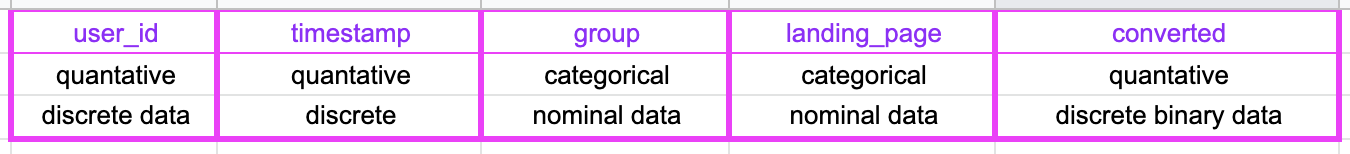

In [5]:
from IPython.display import Image
Image(filename='image/h.png',width=700, height=500)

b. Use the below cell to find the number of rows in the dataset.
>As seen below, 'ab_data' dataset has **294 478** rows and **5** columns. Every column of the dataset represents a variable. Each row corresponds to a user. For example, the 'landing_page' column represents a categorical variable with two categories, respectively, 'old_page' and 'new_page'. The 'converted' column represents a nominal data indicating conversion performance with two options '0' and '1', respectively, 'not converted' and 'converted'.

In [6]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=294478, step=1)

In [8]:
df.shape

(294478, 5)

In [9]:
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


c. The number of unique users in the dataset.
> According the 'user_id' column data below, there are **290 584** unique users in the dataset.

In [10]:
df.user_id.nunique() 

290584

d. The proportion of users converted.
> The proportion refers to the fraction of users who completed conversion. The proportion of users converted is **0.11965919355605512 or 12%**.

In [11]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.
> The number of times the new_page and treatment don't match is **3893**.

In [12]:
df.query('group=="treatment" and landing_page != "new_page" or group=="control" and landing_page=="new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?
> **No**, no row has missing value.

In [13]:
# inspecting how many missing value has each row
df.isnull().sum() 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

We should only use the rows that we can feel confident in the accuracy of the data.
In the case, when the rows where the landing_page and group columns don't match, we should remove these rows.


In [14]:
new = df[(df.landing_page == "new_page") & (df.group == "treatment")]
old = df[(df.landing_page == "old_page") & (df.group == "control")]
df2 = old.append(new)

In [15]:
# double checking all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?
>290 584 unique **user_id** in **df2**

In [16]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?
>1899 **user_id** is repeatred in **df2**

In [17]:
# selecting repeated rows 
print(df2[df2.user_id.duplicated(keep = False)])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 
> 2893 row is the repeat **user_id**
><br>the 1899 row and 2893 row have the same 773 192 user_id in df2

In [18]:
print(df2[df2.user_id.duplicated()])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2 = df2.drop(2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?
>the probability of an individual converting regardless of the page they receive is **0.11959708724499628**

In [20]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?
>given that an individual was in the 'control' group, the probability they converted is **0.1203863045004612**

In [21]:
print(df2.query('group == "control"').converted.mean())


0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?
>given that an individual was in the 'treatment 'group, the probability they converted is **0.11880806551510564**

In [22]:
print(df2.query('group == "treatment"').converted.mean())


0.11880806551510564


d. What is the probability that an individual received the new page?
>the probability that an individual received the new page is **0.5000619442226688**

In [23]:
(df2.landing_page == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

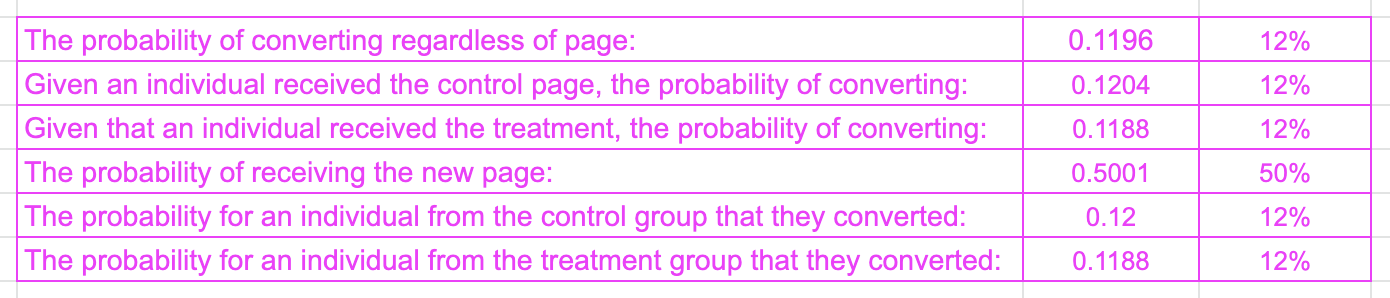

In [24]:
from IPython.display import Image
Image(filename='image/b.png',width=600, height=400)

**Your answer goes here.**

>There is no sufficient evidence to say that the new page leads to more conversions because the probabilities of converting for an individual from the control group and treatment group don't differ much. They are very similar, around 12%. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
>
>I am making assumptions about converted rates to see if there is statistically significant difference in performance for the new and old pages. 

>Null Hypothesis :
>
>new pages are worse than old pages,
>and converted rate for new pages is lower or equal to converted rate for old pages
>> $h_0: $ $p_{new}$ - $p_{old}$ <= 0
>
>
>Alternative Hypothesis :
>
>new pages are better than old pages,
>and converted rate for new pages is greater than converted rate for old pages
>> $h_1: $ $p_{new}$ - $p_{old}$ > 0

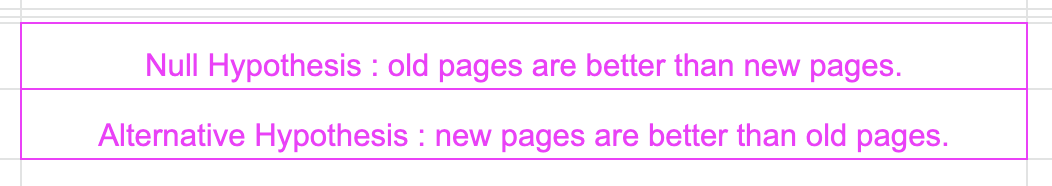

In [25]:
from IPython.display import Image
Image(filename='image/a.png',width=600, height=400)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 
>the **convert rate** for $p_{new}$ under the null is **0.11959708724499628**.

In [26]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null?
>the **convert rate** for $p_{old}$ under the null is **0.11959708724499628**.

In [27]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?
>$n_{new}$ is **145310**.

In [28]:
n_new = df2.query('group == "treatment"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?
>$n_{new}$ is **145274**.

In [29]:
n_old = df2.query('group == "control"')['user_id'].count()
n_old

145274

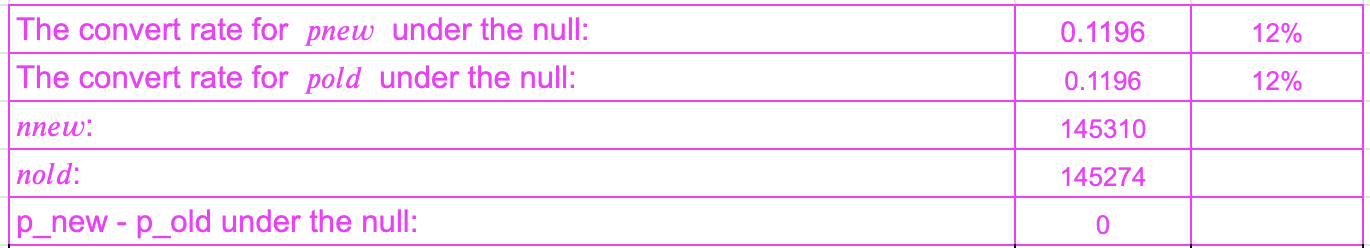

In [30]:
from IPython.display import Image
Image(filename='image/c.png',width=600, height=400)

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
# drawing samples from a Bernoulli binomial distribution
new_page_converted = np.random.binomial(1, p_new, n_new)
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.binomial(1,p_old,n_old)
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
new_page_converted = new_page_converted[:145274]

In [34]:
difference_of_probabilities= new_page_converted.mean() - old_page_converted.mean()
difference_of_probabilities

-0.0008604430249046641

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
p_diffs = (np.random.binomial(n_new, p_new, 10000)/n_new) - (np.random.binomial(n_old, p_old, 10000)/n_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

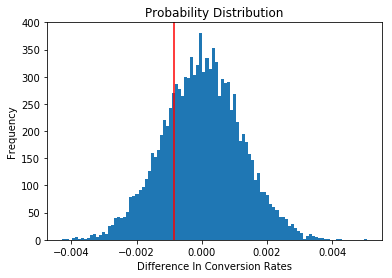

In [36]:
plt.hist(p_diffs, density=1, bins=100)
plt.xlabel('Difference In Conversion Rates')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.axvline(x=difference_of_probabilities, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
actual_difference = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
actual_difference

-0.0015782389853555567

In [38]:
(p_diffs > actual_difference).mean()

0.9057

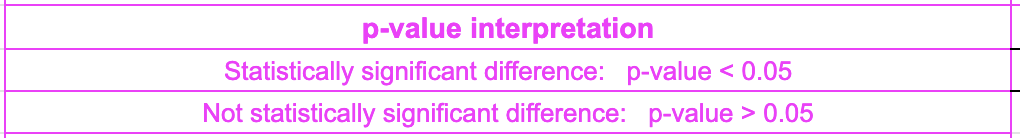

In [39]:
from IPython.display import Image
Image(filename='image/s.png',width=600, height=300)

>k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
> The simulated difference **p_diffs** is greater than **actual_difference** observed in ab_data.csv. A large **p-value** (0.9065 > 0.05) indicates strong evidence in support of our null hypothesis. P-value determines the probability value, significance, of observed statistics when the null hypothesis is true. There is 91% of probability that the new page is not better than the old page.


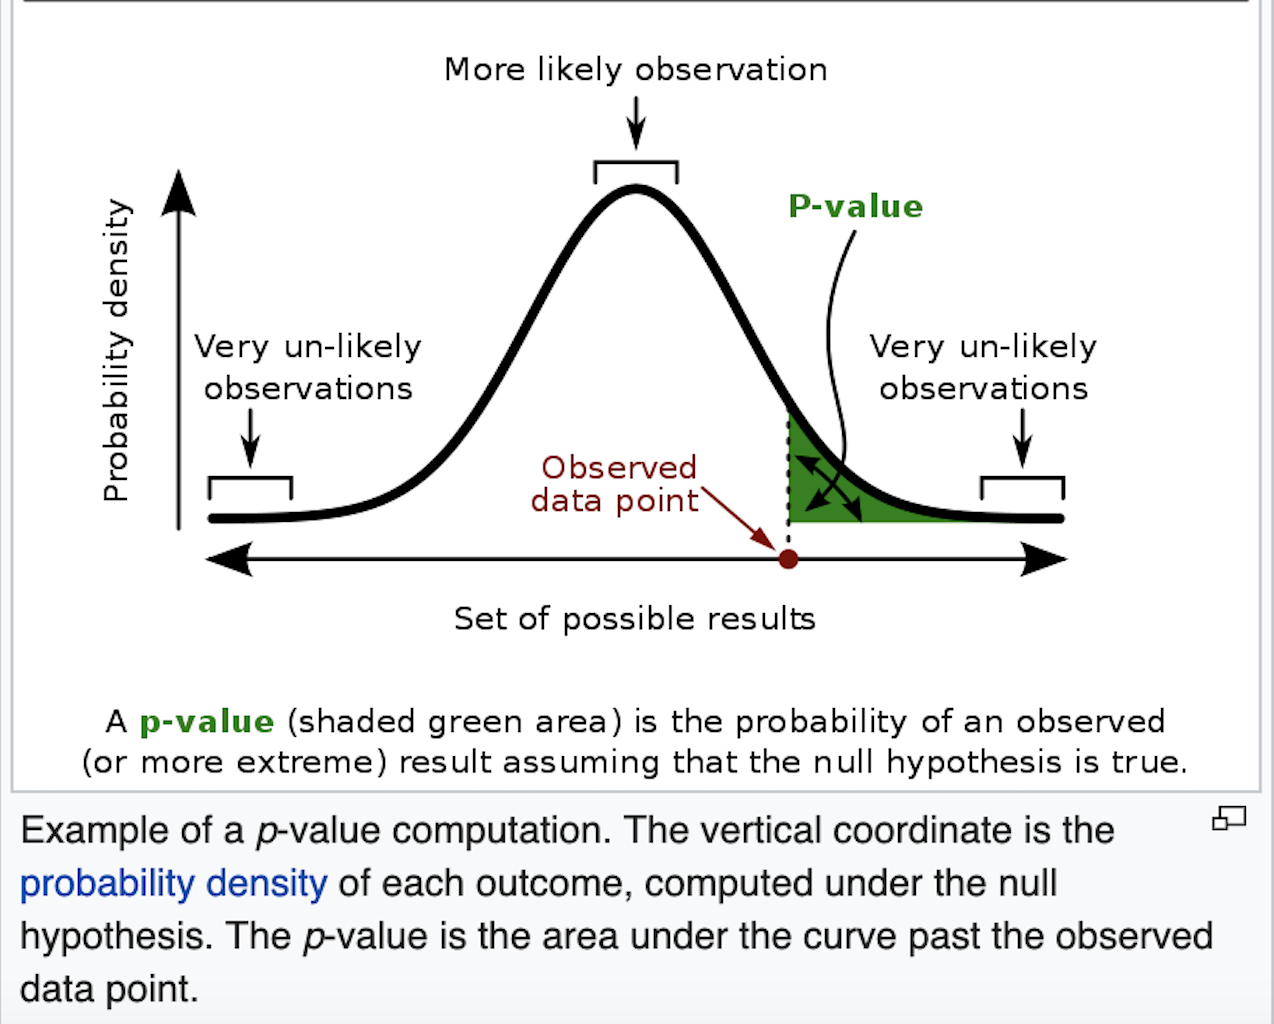

In [40]:
from IPython.display import Image
Image(filename='image/p.png',width=500, height=250)

<font color=red> [p-value] (https://en.wikipedia.org/wiki/P-value) </front>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
p_value, z_score

(0.9050583127590245, 1.3109241984234394)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
>
>"The absolute value of the z-score tells you how many standard deviations you are away from the mean. If a z-score is equal to 0, it is on the mean. If a Z-Score is equal to +1, it is 1 Standard Deviation above the mean. If a z-score is equal to +2, it is 2 Standard Deviations above the mean."  [http://statistics-help-for-students.com/How_do_I_interpret_Z_score_data_in_SPSS.htm#.XMR5GeHPxZ0]


>**z-score 1.31 > 1** and **p-value 0.91 > 0.05** meaning there is no statistical significance between old and new page convertion rates, and we must accept the null hypothesis **$H_0$**, that the new pages are not better than the old ones.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

>The dependent categorical variable, whose value to be predicted  is **'converted'** or **'not converted'**. Since the dependent variable is binary in nature, consisting of the number of 1/0 successes, I should be performing **the logistic type of regression**.
>Regression is an approach for modelling binomial data and relationship between the dependent and independent variables. Logistic regression is more preferable, when response is binary (succeeding or failing).


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2['intercept'] = 1
df2 = df2.join(pd.get_dummies(df2['group']))

In [44]:
df2.rename(index = str,columns = {'treatment':'ab_page'},inplace = True)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
import statsmodels.api as sm

model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

In [46]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        10:56:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

>The p-value associated with ab_page is large **0.190** > 0.05, meaning that there is no significant difference in conversion based on which page a customer receives.
For the hypotheses testing in the Part II, p_value was **0.9068**, meaning that acceptance of **the null hypothesis**  (converted rate for new pages is lower or equal to converted rate for old pages) is reasonable.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

>Factors other than the choice of page can significantly influence convertion. For example, customer location, continent(Europe or America), time zone(PST Pacific Standard Time or EST Eastern Standard Time), day of week (the middle of the week or weekend), hour of the day(night or day time).

>Too many factors can dilute true influence and make results of regression model less precise, particularly if variables are highly correlated.

>Also, regression models assume that the relationship between factors is constant. This might not be true in some situations. For example, convertion rate can be low for both, the new and old pages, because competitors are offering similar services for less.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
df3 = pd.read_csv('countries.csv')
df4 = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df4.head(2)

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1


In [49]:
df4['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
#creating the dummy variables
df4[['US','UK', 'CA']] = pd.get_dummies(df4['country'])[['US','UK','CA']]

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# adding a new column
df4['clarify'] = 1 

In [52]:
model2 = sm.Logit(df4.converted, df4[['clarify','UK', 'CA']])
results = model2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 01 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        10:56:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
clarify       -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

In [53]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
clarify       -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012


In [54]:
# coefficients Interval of each coefficient
print(results.conf_int())

                0         1
clarify -2.010117 -1.983341
UK      -0.016143  0.035976
CA      -0.093493  0.011887


In [55]:
#coefficients
results.params

clarify   -1.996729
UK         0.009916
CA        -0.040803
dtype: float64

In [56]:
results.pvalues

clarify    0.000000
UK         0.455779
CA         0.129068
dtype: float64

>P-values: <br>
>UK **0.455779**,<br>
>CA **0.129068**<br>
>P-value always lies between 0 and 1, it can never be negative. P-value greater than 0.05 suggests not to reject the null hypothesis, meaning there is no statisticaly significant effect on conversion.<br>
>
>Z-values: <br>
>UK **0.746**, <br>
>CA **-1.518** <br>
>The Z-value can be positive or negative. Positive (UK, 0.746) is above the mean. Negative (CA, -1.518) is below the mean. 
>

>  ##  Resources
>
>
>
>
><ul>
>
>
>    
>1.  [A/B Testing Statistics Made Simple By Ayat Shukairy] (https://www.invespcro.com/blog/ab-testing-statistics-made-simple/) <br>
<br>   
>2.  [A/B Testing Statistics: An Easy-to-Understand Guide from CRO Experts] (https://conversionxl.com/blog/ab-testing-statistics/) <br>
<br> 
>3.  [A/B testing] (https://en.wikipedia.org/wiki/A/B_testing) <br>
<br>   
>4.  [ Evan's Awesome A/B Tools] (http://www.evanmiller.org/ab-testing/sample-size.html) <br>
<br>   
>5.  [AB Testing In Real Life] (https://towardsdatascience.com/ab-testing-in-real-life-9b490b3c50d1) <br>
<br>    
>6.  [Pandas Tutorial 2: Aggregation and Grouping] (https://data36.com/pandas-tutorial-2-aggregation-and-grouping/) <br>
<br>
>7.  [How to rewrite your SQL queries in Pandas] (https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e) <br>
<br>    
>8.  [Pandas : Find duplicate rows in a Dataframe] (https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/) <br>
<br>    
>9.  [ A Gentle Introduction to Statistical Hypothesis Tests] (https://machinelearningmastery.com/statistical-hypothesis-tests/ ) <br>
<br>    
>10.  [ Python api numpy random choice] (https://ai-mrkogao.github.io/python_api/nprandomchoice/) <br>
<br>    
>11.  [What does the np.random.binomial function return?] (https://discuss.codecademy.com/t/what-does-the-np-random-binomial-function-return/361162) <br>
<br>    
>12.  [Statsmodels’s Documentation] (https://www.statsmodels.org/stable/index.html) <br>
<br>    
>13.  [Introduction to Linear Regression in Python] (https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0) <br>
<br>    
>14.  [p-value] (https://en.wikipedia.org/wiki/P-value) <br>
<br>    
>15.  [P Values]   (https://www.statsdirect.co.uk/help/basics/p_values.htm) <br>
<br>    
>16.  [z-test] (http://knowledgetack.com/python/statsmodels/proportions_ztest/) <br>
<br>    
>17.  [Z-test] (https://en.wikipedia.org/wiki/Z-test) <br>
<br>    
>18.  [WHAT A P-VALUE TELLS YOU ABOUT STATISTICAL DATA] (https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data) <br>
<br>    
>19.  [What is P-value?] (https://towardsdatascience.com/what-is-a-p-value-b9e6c207247f) <br>
<br>    
>20.  [Building A Logistic Regression in Python, Step by Step] (https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) <br>
<br>
>21.  [Python statsmodels.api.Logit() Examples] (https://www.programcreek.com/python/example/88635/statsmodels.api.Logit) <br>
<br>
>22.  [Logistic Regression in Python] (http://blog.yhat.com/posts/logistic-regression-and-python.html) <br>
<br>    
>23.  [Logistic regression, how get the sm.Logit values (python, statsmodels)] (https://stackoverflow.com/questions/50350816/logistic-regression-get-the-sm-logit-values-python-statsmodels) <br>
<br>
>24.  [Logistics Regression In Python Using Pandas] (https://stepupanalytics.com/logistics-regression-python-using-pandas/) <br>
<br>    
>25.  [Python Data Analysis with Pandas and Matplotlib] (https://ourcodingclub.github.io/2018/04/18/pandas-python-intro.html) <br>
<br>
>26.  [A Guide to Time Series Visualization with Python 3] (https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3) <br>
<br>
>27.  [How to use the build-in function seaborn.regplot] (http://seaborn.pydata.org/generated/seaborn.regplot.html) <br>
<br>
>28.  [Statsmodels regression examples] (http://songhuiming.github.io/pages/2016/07/12/statsmodels-regression-examples/) <br>
<br>
>29. [Jake Vander Plas 'Python Data Science Handbook'] (https://jakevdp.github.io/PythonDataScienceHandbook/) <br>
<br>
>30. [Dive Into Python 3] (https://www.diveinto.org/python3/) <br>
<br>
>31. [Python Crash Course] (https://ehmatthes.github.io/pcc/) <br>
<br>
>32. [CHRIS ALBON 'ML/AI NOTES ARTICLES Technical Notes On Using Data Science & Artificial Intelligence To Fight For Something That Matters'] (https://chrisalbon.com/) <br>
<br>    
>33. [Hypothesis Testing]  (https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/#Hypothesis) <br>
<br>    
>34.  [What is Statistical Significance?]  (https://www.statisticshowto.datasciencecentral.com/what-is-statistical-significance/) <br>
<br>   
>35.  [A/B testing in One Picture]  (https://www.datasciencecentral.com/profiles/blogs/a-b-testing-in-one-picture) <br>
<br>    
>36.  [How to Do A/B Testing: A Checklist You'll Want to Bookmark] (https://blog.hubspot.com/marketing/how-to-do-a-b-testing#sm.001mll31p13lefgoxyj1out7yuqco) <br>
<br>
>37.  [A Simple Guide to Understanding and Creating a Website Conversion Funnel] (https://www.crazyegg.com/blog/website-conversion-funnel/) <br>
<br> 
>38.  [Significance Calculator] (https://neilpatel.com/ab-testing-calculator/) <br>
<br>
>39.  [The Math Behind A/B Testing with Example Python] Code(https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f) <br>
<br>
>40.  [What is the difference and relationship between the binomial and Bernoulli distributions?] (https://math.stackexchange.com/questions/838107/what-is-the-difference-and-relationship-between-the-binomial-and-bernoulli-distr) <br>
<br>
>41.  [difference between n and size parameters in np.random.binomial(n,p, size = 1000)] (https://stackoverflow.com/questions/27644617/difference-between-n-and-size-parameters-in-np-random-binomialn-p-size-1000) <br>
<br>
>42. [DISCRETE PROBABILITY DISTRIBUTIONS (BERNOULLI, BINOMIAL, POISSON] (http://benalexkeen.com/discrete-probability-distributions-bernoulli-binomial-poisson/) <br>
<br>
>43.  [statsmodels.stats.proportion.proportions_ztest] (https://tedboy.github.io/statsmodels_doc/doc/generated/statsmodels.stats.proportion.proportions_ztest.html) <br>
<br>
>44.  [A/B testing] (https://classroom.udacity.com/courses/ud257) <br>
<br>
>45.  [A/B test calculator] (https://abtestguide.com/calc/) <br>
<br>
>46.  [How Not To Run an A/B Test] (http://www.evanmiller.org/how-not-to-run-an-ab-test.html) <br>
<br>
>47.  [How to plot a histogram using Matplotlib in Python with a list of data?] (https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data)<br>
<br>
>
></ul>